# 用同一组缩放系数 $S$ 可以达到怎样的效果

原始的cond, 用固定的$S$, 每次都用优化的方法算出的最优的系数

## 原始数据预处理

原始数据：
- s_output_all.csv
- s_output_all_large.csv

In [2]:
"""直接取平均会因为异常值, 不好看, 故先过滤"""
import pandas as pd

#file_name = f"result/effect_of_s/s_output_all.csv"
file_name = f"result/effect_of_s/s_output_all_large.csv"
df = pd.read_csv(file_name)
# 过滤 s_cond 值大于 300 的行
filtered_df = df[df['s_cond'] < 300]

# 输出过滤前后的总行数
print("过滤前总行数：", len(df))
print("过滤后总行数：", len(filtered_df))

# 计算不同 num_assets 下，对于所有的 year 和 comb，original_cond 的平均值
original_conds = filtered_df.pivot_table(values='original_cond', index=['num_assets'], aggfunc='mean')
s_conds = filtered_df.pivot_table(values='s_cond', index=['num_assets'], aggfunc='mean')
optimized_conds = filtered_df.pivot_table(values='optimized_cond', index=['num_assets'], aggfunc='mean')

# 将三个数据透视表合并成一个新的数据框
result = pd.concat([original_conds, s_conds, optimized_conds], axis=1)

print(result)

#output_filename = f"result/effect_of_s/result.csv"
output_filename = f"result/effect_of_s/result_large.csv"
result.to_csv(output_filename)

过滤前总行数： 6600
过滤后总行数： 6302
            original_cond     s_cond  optimized_cond
num_assets                                          
2             4112.260898  60.035413        5.133652
3             9787.001116  45.862896       11.490768
4            15446.923168  37.684654       11.881779
5            21460.210438  35.659170       14.658939
6            27325.267623  37.683854       18.183532
7            31793.157813  39.639571       21.531748


In [7]:
"""原始的cond太大, 导致可视化不好看, 故取 log"""
import numpy as np
import pandas as pd

#file_name = f"result/effect_of_s/s_output_all.csv"
file_name = f"result/effect_of_s/s_output_all_large.csv"
df = pd.read_csv(file_name)
# 过滤 s_cond 值大于 300 的行
filtered_df = df[df['s_cond'] < 300]

# 输出过滤前后的总行数
print("过滤前总行数：", len(df))
print("过滤后总行数：", len(filtered_df))

# 计算不同 num_assets 下，对于所有的 year 和 comb，original_cond 的平均值
original_conds = filtered_df.pivot_table(values='original_cond', index=['num_assets'], aggfunc='mean')
s_conds = filtered_df.pivot_table(values='s_cond', index=['num_assets'], aggfunc='mean')
optimized_conds = filtered_df.pivot_table(values='optimized_cond', index=['num_assets'], aggfunc='mean')

# 计算 log
original_conds_log = original_conds.apply(np.log2)
s_conds_log = s_conds.apply(np.log2)
optimized_conds_log = optimized_conds.apply(np.log2)

# 将三个数据透视表合并成一个新的数据框
result = pd.concat([original_conds_log, s_conds_log, optimized_conds_log], axis=1)

print(result)

#output_filename = f"result/effect_of_s/result_log.csv"
output_filename = f"result/effect_of_s/result_log_large.csv"
result.to_csv(output_filename)

过滤前总行数： 6600
过滤后总行数： 6302
            original_cond    s_cond  optimized_cond
num_assets                                         
2               12.005716  5.907742        2.359985
3               13.256651  5.519256        3.522403
4               13.915032  5.235905        3.570679
5               14.389377  5.156201        3.873709
6               14.737948  5.235875        4.184561
7               14.956429  5.308869        4.428394


In [9]:
"""用取中位数的方式避免数据的过滤"""
import pandas as pd

#file_name = f"result/effect_of_s/s_output_all.csv"
file_name = f"result/effect_of_s/s_output_all_large.csv"
df = pd.read_csv(file_name)

# 按照 num_assets 分组，对所有的 year 和 comb 求各个列的中位数
original_cond_median = df.groupby('num_assets').median()['original_cond']
s_cond_median = df.groupby('num_assets').median()['s_cond']
optimized_cond_median = df.groupby('num_assets').median()['optimized_cond']

# 将三个数据透视表合并成一个新的数据框
result = pd.concat([original_cond_median, s_cond_median, optimized_cond_median], axis=1)

print(result)

#output_filename = f"result/effect_of_s/result_median.csv"
output_filename = f"result/effect_of_s/result_median_large.csv"
result.to_csv(output_filename)


            original_cond     s_cond  optimized_cond
num_assets                                          
2             2719.956291  44.722446        4.792387
3             8570.491117  27.120371        8.131762
4            13825.384216  22.709895       10.230292
5            18967.528180  22.114827       12.700731
6            23930.138118  24.707331       15.379867
7            28703.221798  28.916090       18.566250


In [11]:
import pandas as pd

#file_name = f"result/effect_of_s/s_output_all.csv"
file_name = f"result/effect_of_s/s_output_all_large.csv"
df = pd.read_csv(file_name)

# 按照 num_assets 分组，对所有的 year 和 comb 求各个列的中位数
original_cond_median = df.groupby('num_assets').median()['original_cond']
s_cond_median = df.groupby('num_assets').median()['s_cond']
optimized_cond_median = df.groupby('num_assets').median()['optimized_cond']

original_conds_log = original_cond_median.apply(np.log2)
s_conds_log = s_cond_median.apply(np.log2)
optimized_conds_log = optimized_cond_median.apply(np.log2)

# 将三个数据透视表合并成一个新的数据框
result = pd.concat([original_conds_log, s_conds_log, optimized_conds_log], axis=1)

print(result)

#output_filename = f"result/effect_of_s/result_median_log.csv"
output_filename = f"result/effect_of_s/result_median_log_large.csv"
result.to_csv(output_filename)

            original_cond    s_cond  optimized_cond
num_assets                                         
2               11.409368  5.482927        2.260744
3               13.065162  4.761305        3.023568
4               13.755032  4.505249        3.354775
5               14.211244  4.466942        3.666840
6               14.546541  4.626867        3.942971
7               14.808925  4.853801        4.214611


## 作图

主要根据 result_median_log.csv 和 result_median_log_large.csv

   num_assets  original_cond    s_cond  optimized_cond
0           2      11.285730  5.928531        2.347240
1           3      13.074352  4.901450        3.053776
2           4      13.727563  4.520134        3.385701
3           5      14.240439  4.509020        3.663309
4           6      14.509699  4.567909        3.865968
5           7      14.733803  4.875868        4.197023


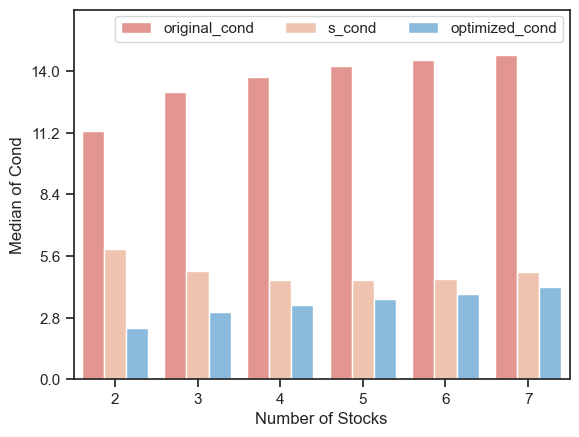

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 读取CSV文件
res_file = f"result/effect_of_s/result_median_log.csv"
#res_file = f"result/effect_of_s/result_median_log_large.csv"
data = pd.read_csv(res_file)
# 选取数据
df = data[['num_assets', 'original_cond', 's_cond', 'optimized_cond']]
# 显示数据
print(data)
# 重塑数据框
df_melt = df.melt('num_assets', var_name='Stat', value_name='Value')
# 设置绘图风格
sns.set(style='ticks')
"""
whitegrid
darkgrid: 黑色网格背景风格。
white: 白色背景风格，无网格。
dark: 黑色背景风格，无网格。
ticks: 白色背景风格，显示刻度线。
"""
# 构造子图
fig, ax = plt.subplots()
# 定义每根柱子的颜色，使用RGB元组
colors = ['steelblue', 'lightcoral', 'darkgreen']
colors = [(147, 181, 207), (35, 118, 183), (20, 74, 116)]
colors = [(97, 154, 195), (35, 118, 183), (20, 74, 116)]
colors = [(97, 154, 195), (35, 118, 183), (17, 101, 154)]
colors = [(97, 154, 195), (22, 119, 179), (17, 90, 154)]

colors = [(240, 136, 133), (249, 192, 165), (126, 190, 234)]
colors = [(r / 255, g / 255, b / 255) for r, g, b in colors]

# 绘制柱状图
sns.barplot(x='num_assets', y='Value', hue='Stat', data=df_melt, palette=colors, ax=ax)

# 为每个柱子添加边框
#for patch in ax.patches:
#    patch.set_edgecolor('black')
#    patch.set_linewidth(1)

# 调整y轴的刻度范围
ax.set_ylim(0, 14) 

# 自定义y轴上的数值标签
# 设置自定义的刻度数量
num_ticks = 6
# 生成等间隔的刻度值
custom_y_ticks = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_ticks)
# 自定义y轴上的刻度标签
custom_y_labels = [f'{tick:.1f}' for tick in custom_y_ticks]
# 设置y轴刻度
plt.yticks(custom_y_ticks, custom_y_labels)
# 添加空间
plt.ylim(top=16.8)  # 调整y轴的上限，用来容纳标签

# 添加图例，并设置水平显示
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=3, borderaxespad=0.4)
"""
borderaxespad: 整体离边缘的距离
"""

# 设置图表标题和坐标轴标签 TODO 选文字
#plt.title('Chart')
plt.xlabel('Number of Stocks')
plt.ylabel('Median of Cond')

# 设置图像的分辨率
dpi = 300  # 设置dpi值
# 保存图像
output_filename = f"image/effect_of_s/chart_median_log.pdf"
plt.savefig(output_filename, dpi=dpi, bbox_inches='tight')

# 显示图表
#plt.show()
